# K-means úlohy pro sestavení třídy

Tento notebook slouží jako dílčí hřiště pro implementaci třídy k-means.

>**POZOR:** Každá úloha se skládá ze dvou buňek (cells) kódů - data a pak kód. Před každým spuštěním kódu doporučuji spoustit nejrve data!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Úloha 1 - Předání dat

V inicializaci třídy je třeba:
* předat hodnotu *k* do proměnné *k* v třídě (metoda *__init__*),
* předat data *X* do proměnné *X* v třídě (metoda *vlozData*).

## Úloha 2 - Vykreslení dat

aneb opakování matka moudrosti. Připravte kód, který:
* Vykreslí ve 2D data v proměnné X.
* Využijte maximum vlastních znalostí:
    * Nastavte barvu bodů.
    * Nastavte tvar bodů.
    * Nastavte popisky os.
    * Nazvěte graf.
    * ...
    
> **POZOR** Místo *%matplotlib notebook* použijte v závěru příkaz *plt.show()*

In [4]:
#cvičná data a jak vypadají
X = np.array([[-1,-1],[-0.8,-1],[-1.1,-1],
              [0,0],[0,0.2],[-0.1,0.2],
              [0,2],[0.1,1.9],[-0.2,2.2]])
X

array([[-1. , -1. ],
       [-0.8, -1. ],
       [-1.1, -1. ],
       [ 0. ,  0. ],
       [ 0. ,  0.2],
       [-0.1,  0.2],
       [ 0. ,  2. ],
       [ 0.1,  1.9],
       [-0.2,  2.2]])

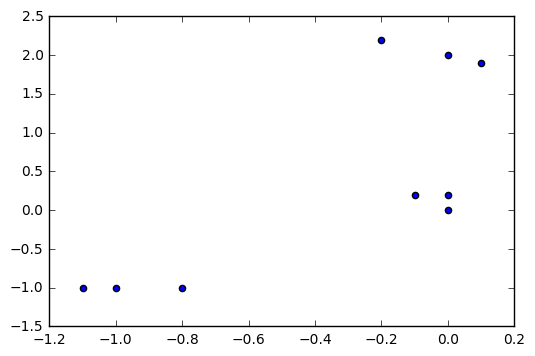

In [5]:
#vykreslete data dle specifikace
plt.scatter(X[:,0],X[:,1])
plt.show()

Nyní využijte kód v třídě *kStredu* a upravte metodu *vykresliData*

## Úloha 3 - Vykreslení shluků

Připravte kód, který:
* Vykreslí ve 2D data v proměnné *X*.
* Obarví data podle příslušnosti dané vektorem *prislusnost*.
* Navíc vykreslí extra body v proměnné *stred*.
    * Tyto body označí jinám markerem - například křížek.
    * Obarví tyto body jinak - například černou.

In [6]:
#cvičná data a jak vypadají
X = np.array([[-1,-1],[-0.8,-1],[-1.1,-1],
              [0,0],[0,0.2],[-0.1,0.2],
              [0,2],[0.1,1.9],[-0.2,2.2]])
prislusnost = [0,0,0,1,1,1,2,2,2]
stred = np.array([[-0.5,-0.5],[0,1],[1,0]])

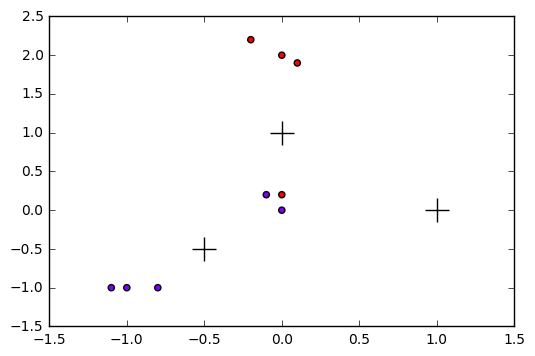

In [44]:
#vykreslete výše uvedená data dle specifikace
plt.scatter(X[:,0],X[:,1],c=prislusnost,cmap='rainbow')
plt.scatter(stred[:, 0], stred[:, 1], s = 300, c = "black",edgecolors="black",marker="+")
plt.show()

## Úloha 4 - E-step - přiřazení

Nyní je potřeba udělat nejnáročnější část, a to přiřazení pozorování ke středům.

Máme:
* Pozorování v proměnné *X*.
* Počet shluků v proměnné *k*.
* Aktuální středy shluků v proměnné *stred*.
* Připravenu matici pro výpočet vzdálenosti *vzdalenost*. Co to je? Jak to vypadá? - zobrazte si!

Co musíme udělat:
* Spočítat vzdálenost každého pozorování od každého středu. Kolik bude takových vzdáleností pro naše data?

> **NÁPOVĚDA:** Máme-li vektory a,b, pak jejich vzálenost určíme jako *np.linalg.norm(a-b)*

> **NÁPOVĚDA:** Použijte for cyklus, nebo cykly?

> **NÁPOVĚDA:** Pro kontrolu je níže pokročilejší kód - výsledky se musí schodovat!! Kdo má hotové, může se na něj podívat.

In [49]:
#cvičná data a jak vypadají
X = np.array([[-1,-1],[-0.8,-1],[-1.1,-1],
              [0,0],[0,0.2],[-0.1,0.2],
              [0,2],[0.1,1.9],[-0.2,2.2]])
k = 3
stred = X[[0,3,5],:]

In [50]:
#proměnná pro vzdálnosti
vzdalenost = np.array([[0.0 for col in range(k)] for row in range(X.shape[0])])

#zde napište kód
for i in range(0,X.shape[0]):
    for j in range(0,k):
        vzdalenost[i,j] = np.linalg.norm(X[i,:]-stred[j,:])

#výpis výsledku
print(vzdalenost)
print(sum(sum(vzdalenost)))

#příslušnost
prislusnost = vzdalenost.argmin(axis=1)

[[ 0.          1.41421356  1.5       ]
 [ 0.2         1.28062485  1.3892444 ]
 [ 0.1         1.48660687  1.56204994]
 [ 1.41421356  0.          0.2236068 ]
 [ 1.56204994  0.2         0.1       ]
 [ 1.5         0.2236068   0.        ]
 [ 3.16227766  2.          1.80277564]
 [ 3.10161248  1.90262976  1.71172428]
 [ 3.2984845   2.2090722   2.00249844]]
35.3472916728


In [54]:
#proměnná pro vzdálenosti
vzdalenost = np.array([[0.0 for col in range(k)] for row in range(X.shape[0])])

#pokročilejší kód
for i in range(0,k):
    rozdil = X-np.array([stred[i,:]]*X.shape[0])
    vzdalenost[:,i] = list([np.linalg.norm(x) for x in rozdil]) 
  
#výpis
print(vzdalenost)
print(sum(sum(vzdalenost)))

#příslušnost
prislusnost = vzdalenost.argmin(axis=1)

[[ 0.03333333  1.41421356  2.49230817]
 [ 0.16666667  1.28062485  2.42231294]
 [ 0.13333333  1.48660687  2.53250864]
 [ 1.39084307  0.          1.30061524]
 [ 1.54092324  0.2         1.10072703]
 [ 1.48024022  0.2236068   1.10163515]
 [ 3.15189537  2.          0.70114193]
 [ 3.08994786  1.90262976  0.61611687]
 [ 3.29055889  2.2090722   0.91411159]]
38.1759735887


## Úloha 5 - M-step - optimalizace

Máme:
* Data *X*.
* Počet shluků *k*.
* *prislusnot* - příslušnost pozorování do shluků,
* *stred* - staré středy.

Co musíme udělat:
* Do proměnné *střed* uložte nové středy shluků (nový střed je aritmetický průměr pozorování).

In [52]:
#cvičná data a jak vypadají
X = np.array([[-1,-1],[-0.8,-1],[-1.1,-1],
              [0,0],[0,0.2],[-0.1,0.2],
              [0,2],[0.1,1.9],[-0.2,2.2]])
k = 3

In [53]:
#staré středy
stred = np.array([[-0.5,-0.5],[0,1],[1,0]])
print(stred)

#zde napište kód
for i in range(0,k):
    stred[i,:]=X[prislusnost == i,:].mean(axis=0)
    
#nové středy
print(stred)

[[-0.5 -0.5]
 [ 0.   1. ]
 [ 1.   0. ]]
[[-0.96666667 -1.        ]
 [ 0.          0.        ]
 [-0.04        1.3       ]]


## Poznámky

> **POZN:** Toto má hlavně výukový charakter, aby jste si uvědomili, co je na pozadí.


* Raw vs final scripts.
* Ladění programu (debuggin) - knihovna [pdb](https://docs.python.org/2/library/pdb.html).
* Programování vlatních algoritmů je až poslední možný krok, nejdříve se používají to, co už vytvořili jiní (Google, rešerše).
* Maximálně se snažte používat práci jiných.

## Proč Python

Můžete si napsat svůj vlastní algoritmus, nebo vylepšit stávající.

## DÚ

Sestavte funkční třídu a použijte ji na trička data.